In [103]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
#from mpl_toolkits import mplot3d

In [106]:
path = "/Users/rajeshr/Desktop/Courses/Semester 2/CS671/Assignment1/Group22/Regression/UnivariateData/22.csv"

In [107]:
data = pd.read_csv(path, header=None, delimiter=",")
data = pd.DataFrame(data)
data

,0,1
0,0.621,0.120370
1,0.649,0.070733
2,0.951,0.774750
3,0.259,0.389780
4,0.481,0.032068
...,...,...
996,0.684,0.144630
997,0.770,0.403200
998,0.731,0.259940
999,0.961,0.823680


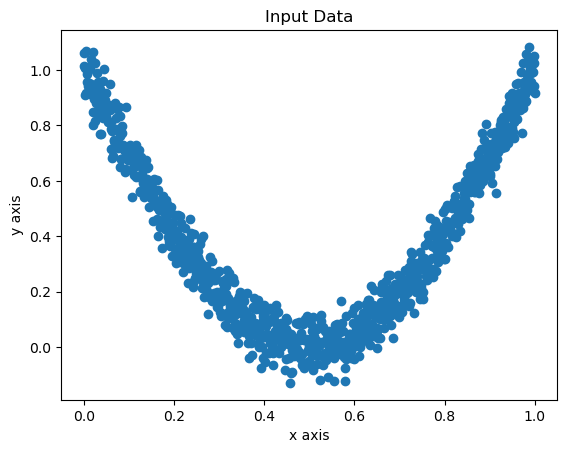

In [108]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.title("Input Data")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

In [109]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [110]:
training, validation, test = split_data(data)
training

,0,1
0,0.621,0.120370
1,0.649,0.070733
2,0.951,0.774750
3,0.259,0.389780
4,0.481,0.032068
...,...,...
595,0.474,0.084088
596,0.125,0.564840
597,0.166,0.496640
598,0.465,-0.032108


In [111]:
def linear(x):
    return x

def inst_error(y, yp):
    return sum(0.5*(y-yp)**2)

In [112]:
def train_data(xn):

    wh = 0.10*np.random.randn(2, 16)
    wo = 0.10*np.random.randn(16, 1)
    avg_err = []
    epoch = 100
    mse = []
    while(epoch):
    
        err = []        
        for i in range(len(xn)):
            y = xn.iat[i,1]

            xi = [1, xn.iat[i,0]] #Input layer
            #--------------------------
            h1 = np.dot(wh.T, xi) #hidden layer 1 out
            a1 = linear(h1) #hidden layer 1 activation out
            #--------------------------
            out = np.dot(wo.T, a1) #Output layer out
            ao = linear(out) #Output activation 
            #--------------------------
            
            en = inst_error(y, ao)
            err.append(en)
            
            neta = 0.01
            
            #Update weights
            wo = wo + (neta * np.outer(a1, (y-ao)))
            
            var1 = np.dot(wo, (y-ao))
            var2 = 1
            
            wh = wh + (neta * np.outer(xi, var1*var2))

            
        avg_error = sum(err)/len(err)
        avg_err.append(avg_error)
        if epoch%1==0:
            print("ERROR: ",avg_error)
        epoch -= 1
        mse.append(np.sqrt(sum(err)/len(err)))
    
    return wh, wo, avg_err, a1, ao, mse

wh, wo, avg_err, h1_out, output, mse = train_data(training)

ERROR:  0.05426961395680497
ERROR:  0.05044585744719909
ERROR:  0.05025353192865343
ERROR:  0.0501202265746882
ERROR:  0.050028074527026935
ERROR:  0.04996444627521996
ERROR:  0.049920575764884664
ERROR:  0.04989035478433881
ERROR:  0.04986953266268221
ERROR:  0.049855163120388984
ERROR:  0.04984521390615511
ERROR:  0.049838289770808744
ERROR:  0.04983343649439752
ERROR:  0.04983000325860269
ERROR:  0.049827546819264726
ERROR:  0.04982576533535424
ERROR:  0.04982445300681257
ERROR:  0.04982346915985158
ERROR:  0.049822717271128386
ERROR:  0.04982213077776334
ERROR:  0.049821663493331884
ERROR:  0.049821283136877795
ERROR:  0.0498209669599928
ERROR:  0.049820698785810726
ERROR:  0.049820466997886066
ERROR:  0.04982026316864041
ERROR:  0.04982008111922611
ERROR:  0.049819916271216694
ERROR:  0.049819765196437826
ERROR:  0.049819625301948604
ERROR:  0.04981949460771776
ERROR:  0.04981937158827717
ERROR:  0.049819255058848363
ERROR:  0.0498191440926272
ERROR:  0.049819037960086396
ERROR:  

In [114]:
def test(xn, wh, wo):
    
    y = []
    for i in range(len(xn)):
        h1 = np.dot(wh.T, [1, xn.iat[i, 0]])
        o = np.dot(wo.T, h1)
        y.append(o[0])
    
    return np.array(y)

y = test(training, wh, wo)
#y

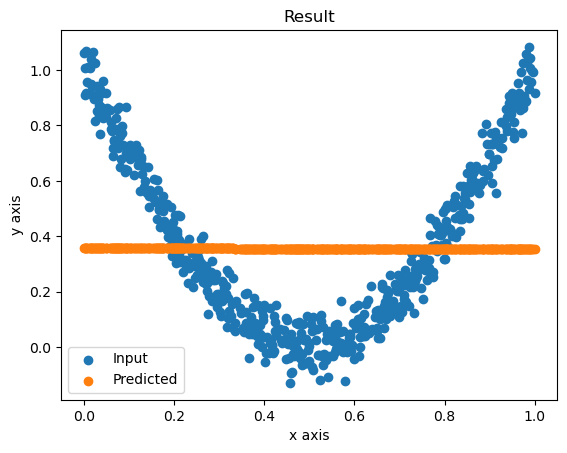

In [115]:
plt.scatter(training.iloc[:,0], training.iloc[:,1])
plt.scatter(training.iloc[:,0], y)
plt.title("Result")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(["Input", "Predicted"])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

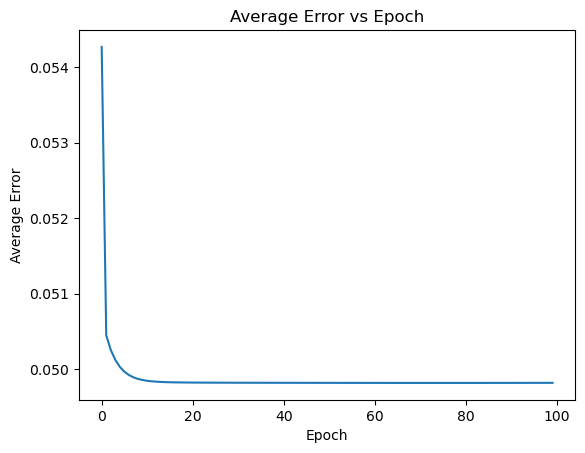

In [116]:
plt.plot(avg_err)
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.savefig("/Users/rajeshr/Desktop/errorvsepoch.png")
plt.show()

ERROR:  0.08256616530941878
ERROR:  0.053096018121680716
ERROR:  0.050554222849019705
ERROR:  0.050470393595869405
ERROR:  0.05044599996741485
ERROR:  0.050421471883529405
ERROR:  0.05039886151720985
ERROR:  0.050378520728527276
ERROR:  0.050360293218229275
ERROR:  0.0503439636406553
ERROR:  0.05032932926201087
ERROR:  0.05031620836434389
ERROR:  0.05030443923098588
ERROR:  0.05029387800272488
ERROR:  0.05028439662378273
ERROR:  0.05027588102355961
ERROR:  0.05026822952338814
ERROR:  0.05026135143937609
ERROR:  0.05025516585427567
ERROR:  0.0502496005353359
ERROR:  0.0502445909787278
ERROR:  0.05024007956414629
ERROR:  0.05023601480566549
ERROR:  0.050232350686959
ERROR:  0.05022904607068119
ERROR:  0.05022606417320607
ERROR:  0.05022337209709712
ERROR:  0.050220940414667396
ERROR:  0.0502187427968324
ERROR:  0.05021675568217054
ERROR:  0.05021495798172188
ERROR:  0.05021333081558242
ERROR:  0.05021185727781262
ERROR:  0.050210522226573566
ERROR:  0.05020931209675724
ERROR:  0.05020821

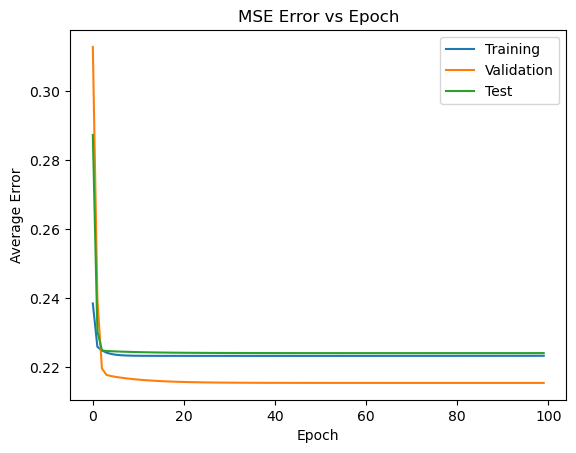

In [92]:
wh, wo, avg_err, h1_out, output, mset = train_data(test)
wh, wo, avg_err, h1_out, output, msev = train_data(validation)
wh, wo, avg_err, h1_out, output, msetr = train_data(training)

plt.plot(msetr)
plt.plot(msev)
plt.plot(mset)

plt.title("MSE Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.legend(["Training", "Validation", "Test"])
plt.savefig("/Users/rajeshr/Desktop/msevsepoch.png")
plt.show()

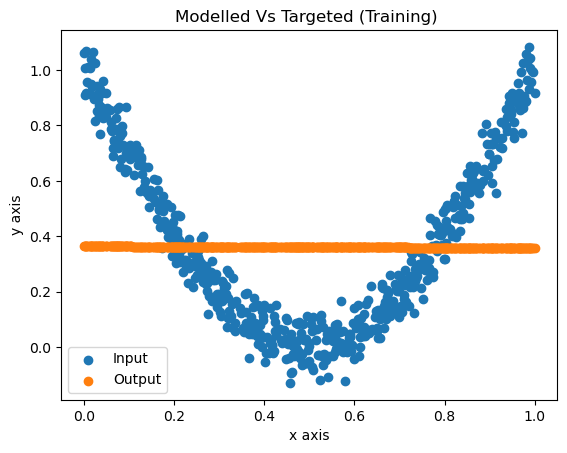

In [95]:
y = test(training, wh, wo)
plt.scatter(training.iloc[:,0], training.iloc[:,1])
plt.scatter(training.iloc[:,0], y)
plt.title("Modelled Vs Targeted (Training) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

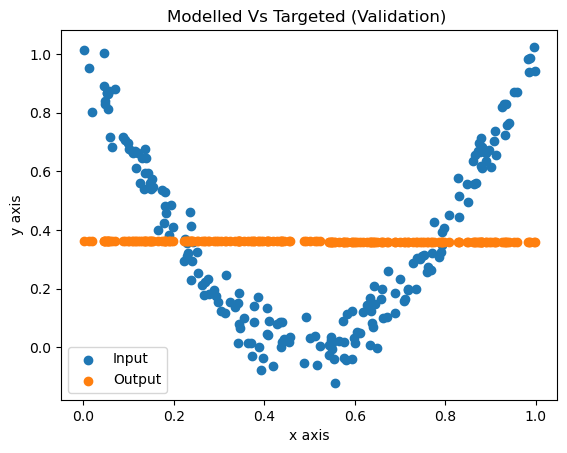

In [98]:
y = test(validation, wh, wo)
plt.scatter(validation.iloc[:,0], validation.iloc[:,1])
plt.scatter(validation.iloc[:,0], y)
plt.title("Modelled Vs Targeted (Validation) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()

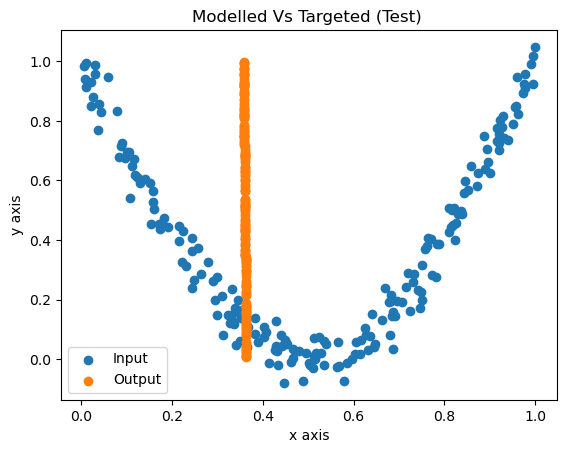

In [102]:
training, validation, test1 = split_data(data)
y = test(test1, wh, wo)
plt.scatter(test1.iloc[:,0], test1.iloc[:,1])
plt.scatter(y, test1.iloc[:,0])
plt.title("Modelled Vs Targeted (Test) ")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend(['Input', 'Output'])
plt.savefig("/Users/rajeshr/Desktop/"+str(np.random.randint(1, 100000))+".png")
plt.show()